In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('parkinsons.csv', delimiter=',')
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [3]:
# Store the features as X and the labels as y
X = data.drop(columns=['name', 'status'])
y = data['status']
X.shape

# 2. four best features as per mid sems
# X = data[['HNR','RPDE','DFA','PPE']]
# X.shape

# # 3. Two-factor components analysis as in file:///home/punny/Downloads/parkinson--published-IJSS%20(1).pdf
# X = data[['MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA']].to_numpy()
# X.shape

# # 4. 2nd best Two-factor components analysis
# X = data[['MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'PPE', 'Jitter:DDP','NHR']].to_numpy()
# X.shape

# 5. 11 features for CC = 0.8
X = data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'HNR', 'RPDE', 'DFA', 'MDVP:Shimmer','spread1', 'spread2', 'D2']].values
X.shape

(195, 11)

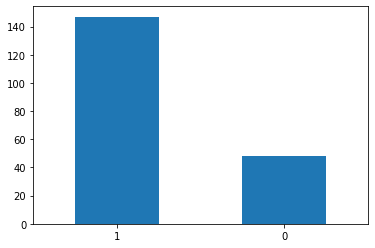

In [4]:
data.status.value_counts().plot(kind="bar", rot=0);

In [5]:
# CORRELATION
# corr_mat = data.corr() 
# fig, ax = plt.subplots(figsize=(20, 12)) 
# sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);
print(y.shape)

(195,)


In [6]:
import matplotlib.pyplot as plt

<Figure size 864x576 with 0 Axes>

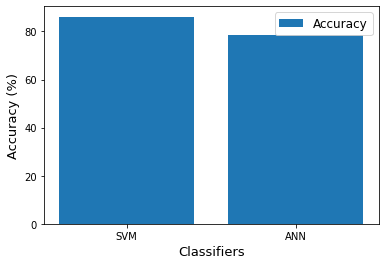

<Figure size 864x576 with 0 Axes>

In [7]:
x1 = [1,2]
acc = [86.15, 78.46]
plt.bar(x1,acc,label="Accuracy")

plt.xlabel('Classifiers', fontsize=13)
plt.ylabel('Accuracy (%)', fontsize=13)
plt.legend(fontsize=12)
my_xticks = ['SVM','ANN']
plt.xticks(x1, my_xticks)
plt.figure(figsize=(12,8))

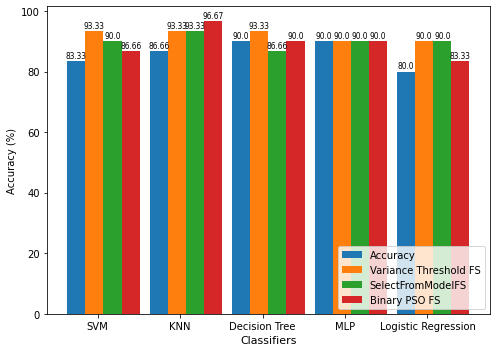

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['SVM', 'KNN', 'Decision Tree', 'MLP', 'Logistic Regression']
acc = [83.33, 86.66, 90, 90, 80]
vt = [93.33, 93.33, 93.33, 90, 90]

sfm = [90, 93.33, 86.66, 90, 90]

bpso = [86.66, 96.67, 90, 90, 83.33]
# sens = [86.95, 86.95, 86.95, 91.30, 82.60]

# spec = [71.42, 85.71, 100, 85.71, 71.42]

x = np.arange(0, len(labels))  # the label locations
width = 0.22 #he width of the bars

# fig = plt.figure(figsize = (20, 25))
fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x, acc, width, label='Accuracy')
# rects2 = ax.bar(x+width, sens, width, label='Sensitivity')
# rects3 = ax.bar(x+(2*width), spec, width, label='Specificity')
rects2 = ax.bar(x+width, vt, width, label='Variance Threshold FS')
rects3 = ax.bar(x+(2*width), sfm, width, label='SelectFromModelFS')
rects4 = ax.bar(x+(3*width), bpso, width, label='Binary PSO FS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Classifiers',fontsize=11)
ax.set_xticks(x+0.26)
ax.set_xticklabels(labels)
ax.legend(loc="lower right")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,1.),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7.5)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

<BarContainer object of 5 artists>

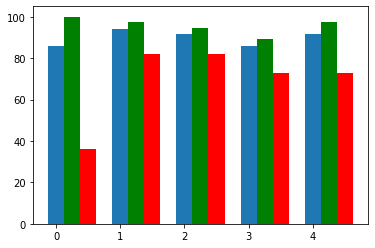

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# acc = [86.15, 78.46]
# sens = [100,100]
# spec = [35.71, 0.5]
acc = [85.71,93.87,91.83,85.71,91.83]
sens = [100,97.36,94.73,89.47,97.36]
spec = [36.36,81.81,81.81,72.72,72.72]

data = [acc, sens, spec]
X = np.arange(5)
plt.bar(X + 0.00, acc, width = 0.25, label='Accuracy')
plt.bar(X + 0.25, sens, color = 'g', width = 0.25)
plt.bar(X + 0.50, spec, color = 'r', width = 0.25)

<Figure size 720x432 with 0 Axes>

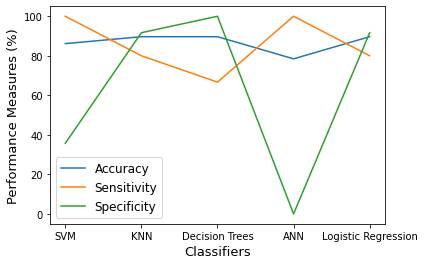

<Figure size 720x432 with 0 Axes>

In [10]:
x1 = [1,2,3,4,5]
acc = [86.15, 89.65, 89.65, 78.46, 89.65]
sens = [100,80,66.67,100,80]
spec = [35.71,91.67,100,0,91.67]
plt.plot(x1,acc,label="Accuracy")
plt.plot(x1,sens,label = "Sensitivity")
plt.plot(x1,spec,label = "Specificity")

plt.xlabel('Classifiers', fontsize=13)
plt.ylabel('Performance Measures (%)', fontsize=13)
plt.legend(fontsize=12)
my_xticks = ['SVM','KNN','Decision Trees','ANN','Logistic Regression']
plt.xticks(x1, my_xticks)
plt.figure(figsize=(10,6))

In [11]:
from sklearn import model_selection

# Store the features as X and the labels as y
data = pd.read_csv('parkinsons.csv', delimiter=',')
X = data.drop(columns=['name', 'status'])
y = data['status']

# 67% training set and 33% testing set
x_train, x_test, y_train, y_test = model_selection.train_test_split (X, y, test_size=0.33, random_state=0)
y_train = pd.get_dummies(y_train)
print(y_train.shape)

y_test = pd.get_dummies(y_test)

(130, 2)


In [12]:
n_input_features = x_train.shape[1]
n_input_features
print(n_input_features)
n_train_samples = x_train.shape[0]
print(n_train_samples)

22
130


In [13]:
from sklearn.metrics import confusion_matrix